In [2]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.30/04


In [3]:
ERA = "2016preVFP"
MEASURE = "electron"
isQCD = False
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysisV2"

In [4]:
ptcorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptcorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptcorr_bins = [15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.479, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [5]:
if isQCD:
    raise NotImplementedError("QCD is not implemented yet")
else:
    file_path = f"{WORKDIR}/MeasFakeRateV4/results/{ERA}/ROOT/{MEASURE}/fakerate.root"
    
assert os.path.exists(file_path), f"File not found: {file_path}"
f = ROOT.TFile(file_path)
h = f.Get("fake rate - (Central)")

In [6]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)
    
def setSystematics(fakerate: ROOT.TH1D):
    for bin in range(0, fakerate.GetNbinsX()+1):
        fakerate.SetBinError(bin, fakerate.GetBinContent(bin)*0.3)

In [7]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

In [8]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

setSystematics(projections["eta1"])
setSystematics(projections["eta2"])
setSystematics(projections["eta3"])

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(15., 50.)
    #if isQCD:
    #    hist.GetXaxis().SetRangeUser(10., 100.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)

legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

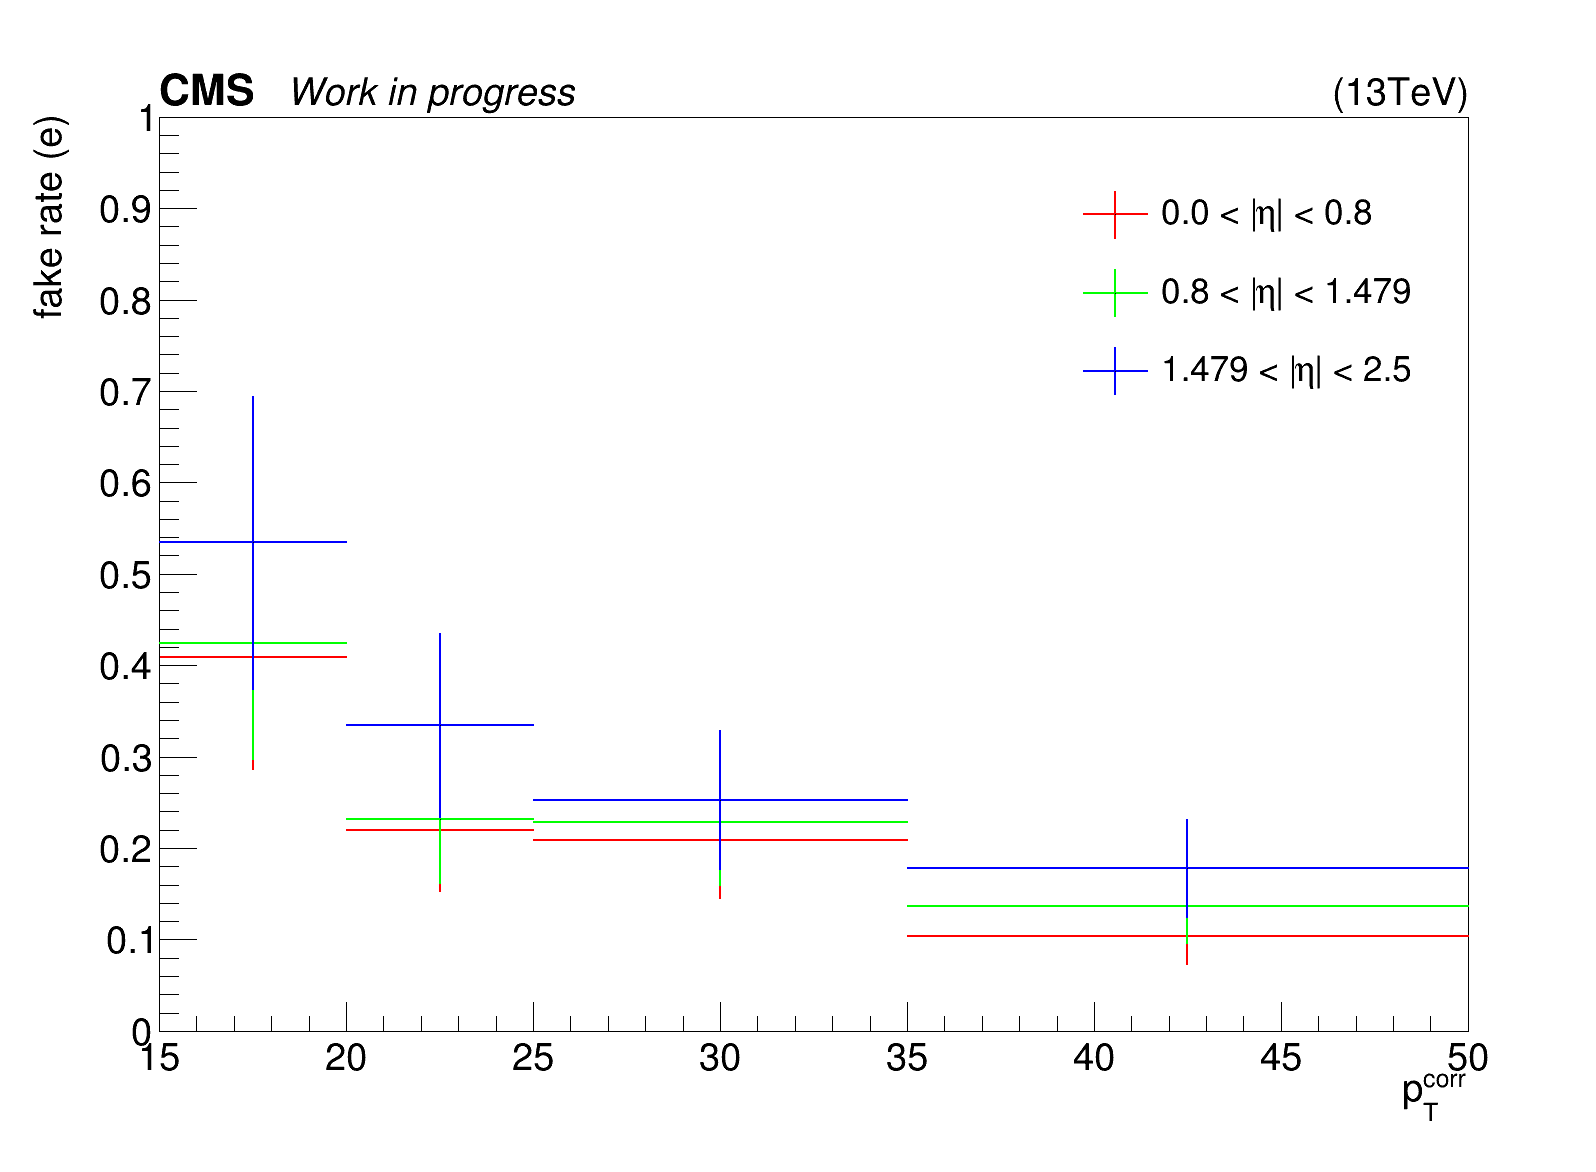

In [9]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.83, "measured in QCD MC")


canvas.Draw()